Air Quality Forecasting using Machine Learning

by  ADITI RAUTELA (00601182024) & ANKITA DAS (02001182024)

ECE-AI 1 , IGDTUW

    
    ____________________________________________________________________________________________________________________

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd

Data Collection & Processing

Dataset link: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?select=city_hour.csv

CSV file link: https://drive.google.com/file/d/1RXlv1AQoqkCD_I8fbleOw9ItrfPcFSLY/view?usp=sharing

In [ ]:
# loading the data from csv file to pandas dataframe
air_quality_data=pd.read_csv('/content/city_hour.csv')

In [ ]:
# printing the first 5 rows of the dataframe
air_quality_data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
air_quality_data.tail()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
496849,Lucknow,2017-06-01 12:00:00,80.42,NaN,4.65,13.52,6.24,NaN,NaN,3.36,46.65,1.74,3.23,NaN,101.0,Moderate
496850,Lucknow,2017-06-01 13:00:00,77.13,NaN,7.52,11.28,6.24,NaN,NaN,3.16,45.92,2.97,2.89,NaN,104.0,Moderate
496851,Lucknow,2017-06-01 14:00:00,83.14,NaN,6.00,13.20,6.24,NaN,NaN,4.19,42.66,3.03,2.74,NaN,110.0,Moderate
496852,Lucknow,2017-06-01 15:00:00,68.58,NaN,6.85,21.36,6.24,NaN,NaN,4.50,38.06,1.82,2.86,NaN,107.0,Moderate
496853,Lucknow,2017-06-01 16:00:00,75.26,NaN,8.59,20.89,6.24,NaN,1.12,4.03,36.06,1.90,3.15,NaN,111.0,M


In [ ]:
# removing unnecessary columns from the dataframe
columns_to_drop = ['AQI_Bucket']
air_quality_data = air_quality_data.drop(columns=columns_to_drop)
display(air_quality_data.head())
display(air_quality_data.tail())

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
496849,Lucknow,2017-06-01 12:00:00,80.42,NaN,4.65,13.52,6.24,NaN,NaN,3.36,46.65,1.74,3.23,NaN,101.0
496850,Lucknow,2017-06-01 13:00:00,77.13,NaN,7.52,11.28,6.24,NaN,NaN,3.16,45.92,2.97,2.89,NaN,104.0
496851,Lucknow,2017-06-01 14:00:00,83.14,NaN,6.00,13.20,6.24,NaN,NaN,4.19,42.66,3.03,2.74,NaN,110.0
496852,Lucknow,2017-06-01 15:00:00,68.58,NaN,6.85,21.36,6.24,NaN,NaN,4.50,38.06,1.82,2.86,NaN,107.0
496853,Lucknow,2017-06-01 16:00:00,75.26,NaN,8.59,20.89,6.24,NaN,1.12,4.03,36.06,1.90,3.15,NaN,111.0


In [ ]:
air_quality_data.shape

(496854, 15)

707874 represents the last data point in the dataframe

index = 707874

rows = 707875th row

In [ ]:
# getting some info about the data
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496854 entries, 0 to 496853
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   City      496854 non-null  object 
 1   Datetime  496854 non-null  object 
 2   PM2.5     416544 non-null  float64
 3   PM10      318275 non-null  float64
 4   NO        438557 non-null  float64
 5   NO2       440218 non-null  float64
 6   NOx       408173 non-null  float64
 7   NH3       325761 non-null  float64
 8   CO        432182 non-null  float64
 9   SO2       426182 non-null  float64
 10  O3        426956 non-null  float64
 11  Benzene   386132 non-null  float64
 12  Toluene   358928 non-null  float64
 13  Xylene    160982 non-null  float64
 14  AQI       430158 non-null  float64
dtypes: float64(13), object(2)
memory usage: 56.9+ MB


In [ ]:
# checking the number of missing values in the dataframe
air_quality_data.isnull().sum()

,0
City,0
Datetime,0
PM2.5,80310
PM10,178579
NO,58297
NO2,56636
NOx,88681
NH3,171093
CO,64672
SO2,70672


This shows the actual number if misssing values in the dataframe

Handling the missing values

Replace all NaN values in each numeric column with mean of that specific column

In [ ]:
# Calculate the mean of each numeric column
numeric_columns_mean = air_quality_data.select_dtypes(include=np.number).mean()
display (numeric_columns_mean)

,0
PM2.5,66.330892
PM10,124.933562
NO,16.644651
NO2,29.127966
NOx,31.819397
NH3,26.903670
CO,2.690765
SO2,13.688705
O3,35.286518
Benzene,2.945039


In [ ]:
# replacing the missing values of each numeric column with mean value for that specific numeric columns
air_quality_data[numeric_columns_mean.index] = air_quality_data[numeric_columns_mean.index].fillna(numeric_columns_mean)

In [ ]:
air_quality_data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01 01:00:00,66.330892,124.933562,1.00,40.01,36.37,26.90367,1.00,122.07,35.286518,0.0,0.0,0.0,170.12935
1,Ahmedabad,2015-01-01 02:00:00,66.330892,124.933562,0.02,27.75,19.73,26.90367,0.02,85.90,35.286518,0.0,0.0,0.0,170.12935
2,Ahmedabad,2015-01-01 03:00:00,66.330892,124.933562,0.08,19.32,11.08,26.90367,0.08,52.83,35.286518,0.0,0.0,0.0,170.12935
3,Ahmedabad,2015-01-01 04:00:00,66.330892,124.933562,0.30,16.45,9.20,26.90367,0.30,39.53,153.580000,0.0,0.0,0.0,170.12935
4,Ahmedabad,2015-01-01 05:00:00,66.330892,124.933562,0.12,14.90,7.85,26.90367,0.12,32.63,35.286518,0.0,0.0,0.0,170.12935


In [ ]:
air_quality_data.tail()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
496849,Lucknow,2017-06-01 12:00:00,80.42,124.933562,4.65,13.52,6.24,26.90367,2.690765,3.36,46.65,1.74,3.23,3.064146,101.0
496850,Lucknow,2017-06-01 13:00:00,77.13,124.933562,7.52,11.28,6.24,26.90367,2.690765,3.16,45.92,2.97,2.89,3.064146,104.0
496851,Lucknow,2017-06-01 14:00:00,83.14,124.933562,6.00,13.20,6.24,26.90367,2.690765,4.19,42.66,3.03,2.74,3.064146,110.0
496852,Lucknow,2017-06-01 15:00:00,68.58,124.933562,6.85,21.36,6.24,26.90367,2.690765,4.50,38.06,1.82,2.86,3.064146,107.0
496853,Lucknow,2017-06-01 16:00:00,75.26,124.933562,8.59,20.89,6.24,26.90367,1.120000,4.03,36.06,1.90,3.15,3.064146,111.0


In [ ]:
#checking the number of missing values in the dataframe
air_quality_data.isnull().sum()

,0
City,0
Datetime,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


Two tasks can be performed on this dataset:

1. Forecasting
2. Regression

Forecasting with FB Prophet Algorithm

We have to convert datetime column from object datatype to datetime format

In [ ]:
data = pd.DataFrame()

In [ ]:
data['ds'] = pd.to_datetime(air_quality_data['Datetime'])

In [ ]:
data.head()

,ds
0,2015-01-01 01:00:00
1,2015-01-01 02:00:00
2,2015-01-01 03:00:00
3,2015-01-01 04:00:00
4,2015-01-01 05:00:00


In [ ]:
data.tail()

,ds
496849,2017-06-01 12:00:00
496850,2017-06-01 13:00:00
496851,2017-06-01 14:00:00
496852,2017-06-01 15:00:00
496853,2017-06-01 16:00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496854 entries, 0 to 496853
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      496854 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.8 MB


In [ ]:
data['y'] = air_quality_data['PM2.5']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,66.330892
1,2015-01-01 02:00:00,66.330892
2,2015-01-01 03:00:00,66.330892
3,2015-01-01 04:00:00,66.330892
4,2015-01-01 05:00:00,66.330892


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,80.42
496850,2017-06-01 13:00:00,77.13
496851,2017-06-01 14:00:00,83.14
496852,2017-06-01 15:00:00,68.58
496853,2017-06-01 16:00:00,75.26


In [ ]:
data['y'] = air_quality_data['PM10']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,124.933562
1,2015-01-01 02:00:00,124.933562
2,2015-01-01 03:00:00,124.933562
3,2015-01-01 04:00:00,124.933562
4,2015-01-01 05:00:00,124.933562


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,124.933562
496850,2017-06-01 13:00:00,124.933562
496851,2017-06-01 14:00:00,124.933562
496852,2017-06-01 15:00:00,124.933562
496853,2017-06-01 16:00:00,124.933562


In [ ]:
data['y'] = air_quality_data['NO']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,1.00
1,2015-01-01 02:00:00,0.02
2,2015-01-01 03:00:00,0.08
3,2015-01-01 04:00:00,0.30
4,2015-01-01 05:00:00,0.12


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,4.65
496850,2017-06-01 13:00:00,7.52
496851,2017-06-01 14:00:00,6.00
496852,2017-06-01 15:00:00,6.85
496853,2017-06-01 16:00:00,8.59


In [ ]:
data['y'] = air_quality_data['NO2']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,40.01
1,2015-01-01 02:00:00,27.75
2,2015-01-01 03:00:00,19.32
3,2015-01-01 04:00:00,16.45
4,2015-01-01 05:00:00,14.90


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,13.52
496850,2017-06-01 13:00:00,11.28
496851,2017-06-01 14:00:00,13.20
496852,2017-06-01 15:00:00,21.36
496853,2017-06-01 16:00:00,20.89


In [ ]:
data['y'] = air_quality_data['NOx']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,36.37
1,2015-01-01 02:00:00,19.73
2,2015-01-01 03:00:00,11.08
3,2015-01-01 04:00:00,9.20
4,2015-01-01 05:00:00,7.85


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,6.24
496850,2017-06-01 13:00:00,6.24
496851,2017-06-01 14:00:00,6.24
496852,2017-06-01 15:00:00,6.24
496853,2017-06-01 16:00:00,6.24


In [ ]:
data['y'] = air_quality_data['NH3']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,26.90367
1,2015-01-01 02:00:00,26.90367
2,2015-01-01 03:00:00,26.90367
3,2015-01-01 04:00:00,26.90367
4,2015-01-01 05:00:00,26.90367


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,26.90367
496850,2017-06-01 13:00:00,26.90367
496851,2017-06-01 14:00:00,26.90367
496852,2017-06-01 15:00:00,26.90367
496853,2017-06-01 16:00:00,26.90367


In [ ]:
data['y'] = air_quality_data['CO']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,1.00
1,2015-01-01 02:00:00,0.02
2,2015-01-01 03:00:00,0.08
3,2015-01-01 04:00:00,0.30
4,2015-01-01 05:00:00,0.12


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,2.690765
496850,2017-06-01 13:00:00,2.690765
496851,2017-06-01 14:00:00,2.690765
496852,2017-06-01 15:00:00,2.690765
496853,2017-06-01 16:00:00,1.120000


In [ ]:
data['y'] = air_quality_data['SO2']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,122.07
1,2015-01-01 02:00:00,85.90
2,2015-01-01 03:00:00,52.83
3,2015-01-01 04:00:00,39.53
4,2015-01-01 05:00:00,32.63


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,3.36
496850,2017-06-01 13:00:00,3.16
496851,2017-06-01 14:00:00,4.19
496852,2017-06-01 15:00:00,4.50
496853,2017-06-01 16:00:00,4.03


In [ ]:
data['y'] = air_quality_data['O3']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,35.286518
1,2015-01-01 02:00:00,35.286518
2,2015-01-01 03:00:00,35.286518
3,2015-01-01 04:00:00,153.580000
4,2015-01-01 05:00:00,35.286518


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,46.65
496850,2017-06-01 13:00:00,45.92
496851,2017-06-01 14:00:00,42.66
496852,2017-06-01 15:00:00,38.06
496853,2017-06-01 16:00:00,36.06


In [ ]:
data['y'] = air_quality_data['Benzene']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,0.0
1,2015-01-01 02:00:00,0.0
2,2015-01-01 03:00:00,0.0
3,2015-01-01 04:00:00,0.0
4,2015-01-01 05:00:00,0.0


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,1.74
496850,2017-06-01 13:00:00,2.97
496851,2017-06-01 14:00:00,3.03
496852,2017-06-01 15:00:00,1.82
496853,2017-06-01 16:00:00,1.90


In [ ]:
data['y'] = air_quality_data['Xylene']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,0.0
1,2015-01-01 02:00:00,0.0
2,2015-01-01 03:00:00,0.0
3,2015-01-01 04:00:00,0.0
4,2015-01-01 05:00:00,0.0


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,3.064146
496850,2017-06-01 13:00:00,3.064146
496851,2017-06-01 14:00:00,3.064146
496852,2017-06-01 15:00:00,3.064146
496853,2017-06-01 16:00:00,3.064146


In [ ]:
data['y'] = air_quality_data['AQI']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,170.12935
1,2015-01-01 02:00:00,170.12935
2,2015-01-01 03:00:00,170.12935
3,2015-01-01 04:00:00,170.12935
4,2015-01-01 05:00:00,170.12935


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,101.0
496850,2017-06-01 13:00:00,104.0
496851,2017-06-01 14:00:00,110.0
496852,2017-06-01 15:00:00,107.0
496853,2017-06-01 16:00:00,111.0


In [ ]:
data['y'] = air_quality_data['Toluene']

In [ ]:
data.head()

,ds,y
0,2015-01-01 01:00:00,0.0
1,2015-01-01 02:00:00,0.0
2,2015-01-01 03:00:00,0.0
3,2015-01-01 04:00:00,0.0
4,2015-01-01 05:00:00,0.0


In [ ]:
data.tail()

,ds,y
496849,2017-06-01 12:00:00,3.23
496850,2017-06-01 13:00:00,2.89
496851,2017-06-01 14:00:00,2.74
496852,2017-06-01 15:00:00,2.86
496853,2017-06-01 16:00:00,3.15


In [ ]:
#installing the prophet library

! pip install prophet

In [ ]:
#importing the prophet model

from prophet import Prophet

In [ ]:
# training the Prophet model

model = Prophet()
model.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpkjusc2yn/xcfp5h8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkjusc2yn/ukb37zty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57699', 'data', 'file=/tmp/tmpkjusc2yn/xcfp5h8s.json', 'init=/tmp/tmpkjusc2yn/ukb37zty.json', 'output', 'file=/tmp/tmpkjusc2yn/prophet_model5n73lia9/prophet_model-20250803101810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:20:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# making future predictions using ML model

future = model.make_future_dataframe(periods=365, freq='h')

future.tail()

,ds
48552,2020-07-16 01:00:00
48553,2020-07-16 02:00:00
48554,2020-07-16 03:00:00
48555,2020-07-16 04:00:00
48556,2020-07-16 05:00:00


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
48552,2020-07-16 01:00:00,7.332098,-10.849196,26.176454
48553,2020-07-16 02:00:00,6.756720,-12.326260,25.863639
48554,2020-07-16 03:00:00,6.359752,-12.656562,25.699716
48555,2020-07-16 04:00:00,6.062092,-13.649038,25.801563
48556,2020-07-16 05:00:00,5.820517,-11.139964,24.318142


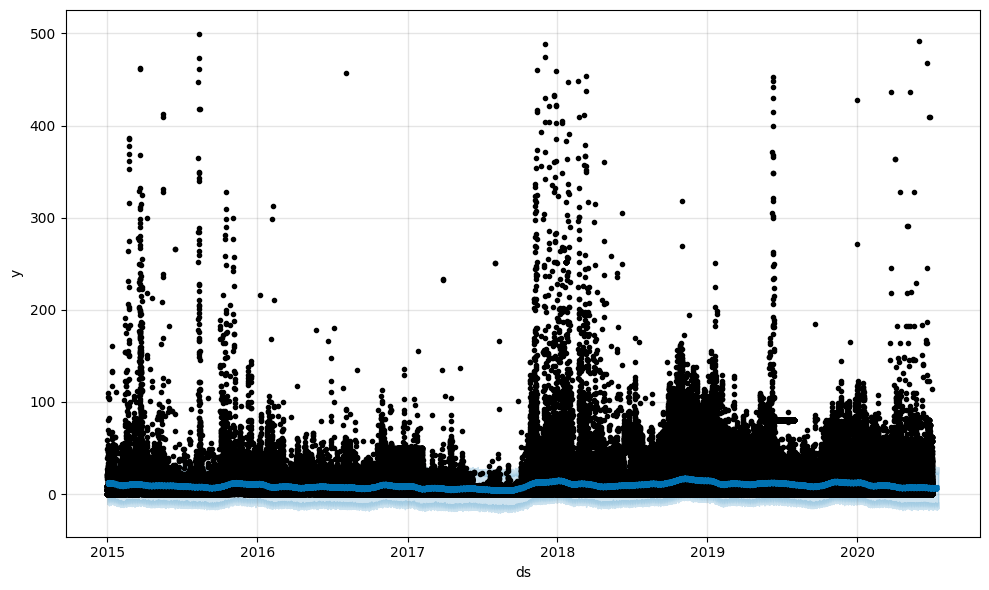

In [ ]:
fig1 = model.plot(forecast)

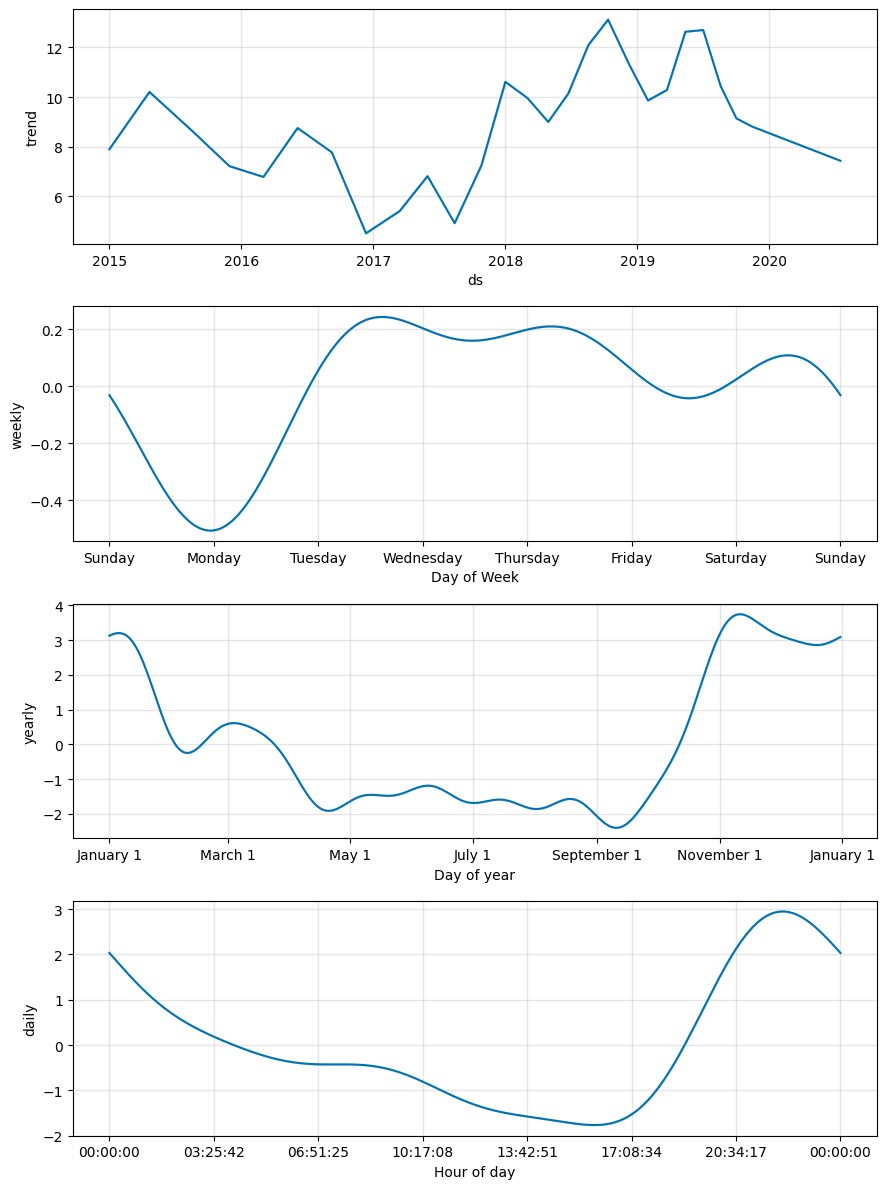

In [ ]:
fig2 = model.plot_components(forecast)